<a href="https://colab.research.google.com/github/rohankalbag/EE325-Assignment-Repo/blob/main/Assignment%204/Q3_corrected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15,15

def Q(n, p1, p2, p3):
    probs = [p1,p2,p3]
    k = np.random.choice([n+1,n-1,n], p=probs)
    return k


n = 0
mus = [0.9,0.7,0.7]
las = [0.7,0.9,0.7]

main_dict = {}

for i in range(len(mus)):
    mu=mus[i]
    la=las[i]
    value_matrix = []
    p1 = la*(1-mu)
    p2 = (1-la)*mu
    p3 = (1-mu)*(1-la) + la*mu
    for j in range(1000):
        values = [0]
        #changes = []
        n = 0
        for i in range(1000-1):
            n = Q(n,p1,p2,p3)
            #changes += [n]
            values += [n]

        value_matrix += [values]
        # print(f"Time average for lambda={la} and mu={mu} = {np.mean(np.array(values))}")
        # plt.plot(range(1,1001),values)
        # plt.ylabel(f"Q(n) for lambda = {la} and mu = {mu}")
        # plt.xlabel("n")
        # plt.show()
    main_dict[(mu,la)] = value_matrix

In [2]:
for key in list(main_dict.keys()):
    val = main_dict[key]
    val = np.array(val)
    print(val.shape)
    mean_func = np.mean(val,axis=0)
    print(f"mu={key[0]} and lambda={key[1]}")
    print(f"Mean = {np.mean(mean_func)}")
    print(f"Standard Deviation = {np.std(mean_func)}")
    print(f"Stddev/Mean ={np.std(mean_func)/np.average(mean_func)}",'\n')

(1000, 1000)
mu=0.9 and lambda=0.7
Mean = -99.96714899999999
Standard Deviation = 57.924458494808555
Stddev/Mean =-0.5794349351186214 

(1000, 1000)
mu=0.7 and lambda=0.9
Mean = 100.095133
Standard Deviation = 57.97030768856856
Stddev/Mean =0.5791521121068749 

(1000, 1000)
mu=0.7 and lambda=0.7
Mean = 0.135742
Standard Deviation = 0.1612623559173064
Stddev/Mean =1.1880063349391228 



In [3]:
r_holder = []
for key in main_dict.keys():
    val = main_dict[key]
    val = np.array(val)
    R = np.dot(val.T,val)/val.shape[0]
    print(val.shape)
    r_holder += [R]

(1000, 1000)
(1000, 1000)
(1000, 1000)


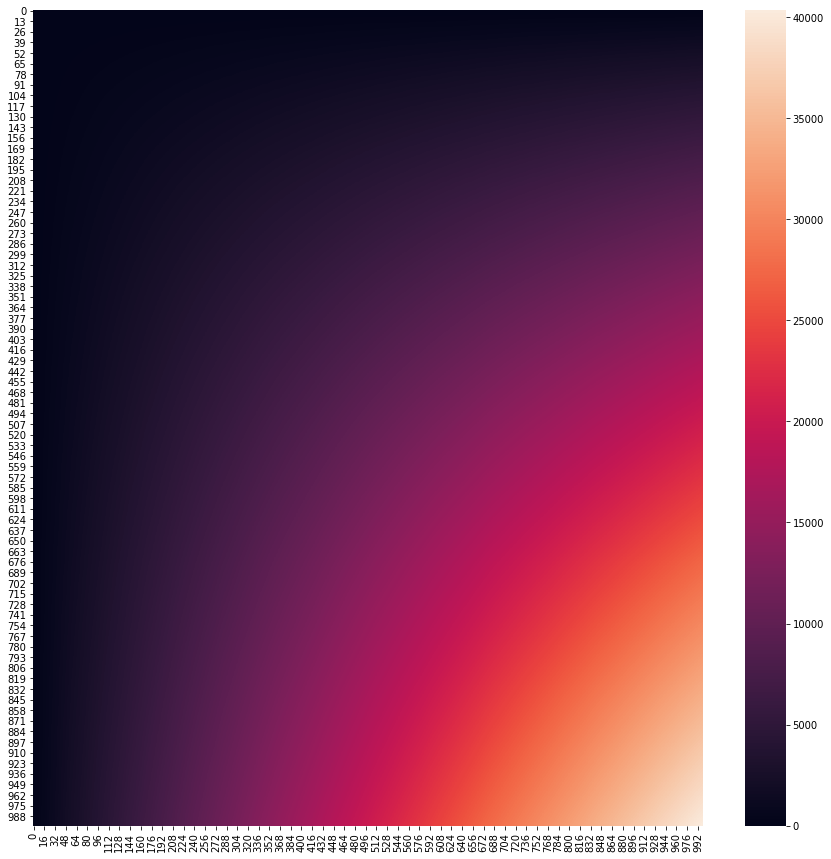

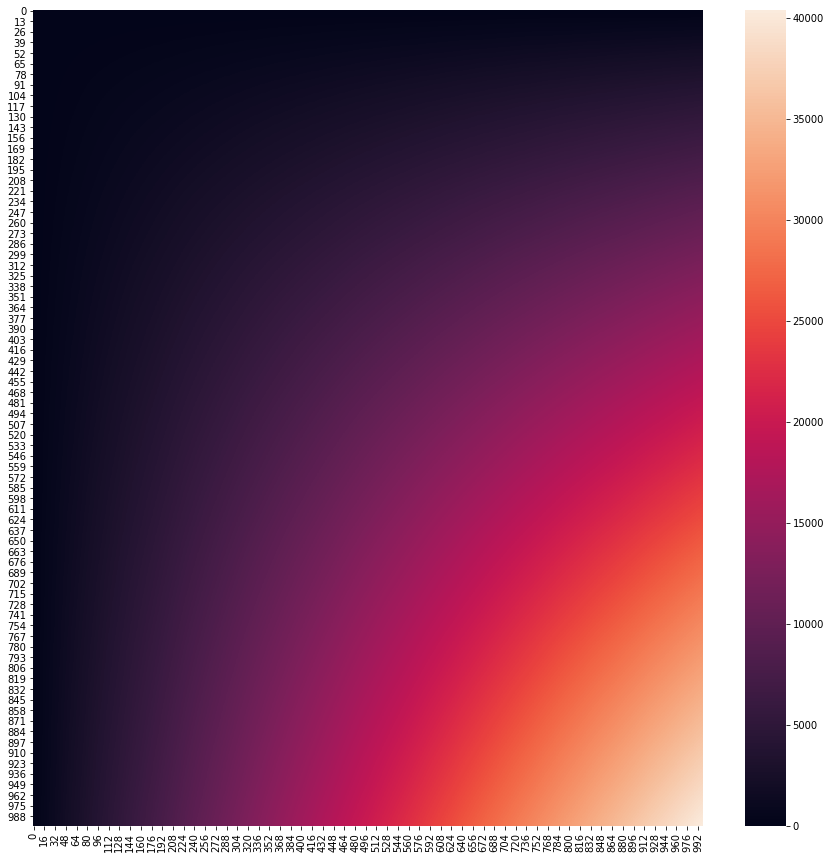

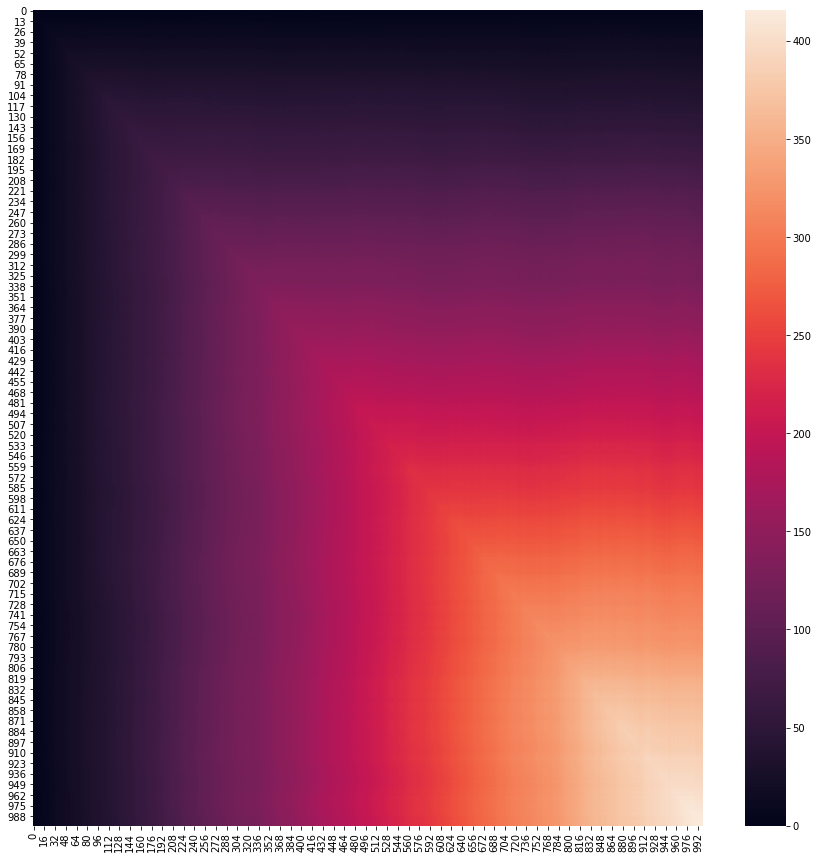

In [4]:
import seaborn as sns

for R in r_holder:
    sns.heatmap(R)
    plt.show()

In [5]:
for key in main_dict.keys():
    val = main_dict[key]
    val = np.array(val)
    #print(f"shape = ",val.shape)
    mean_func = np.average(val,axis=0)
    time_func = np.average(val,axis=1)
    print(f"mu={key[0]} and lambda={key[1]}")
    print("Mean Function")
    print(f"Mean = {np.average(mean_func)}")
    print(f"Standard Deviation = {np.std(mean_func)}")
    print(f"Mean/Stddev ={np.average(mean_func)/np.std(mean_func)}",'\n')
    print("Time Function")
    print(f"Mean = {np.average(time_func)}")
    print(f"Standard Deviation = {np.std(time_func)}")
    print(f"Mean/Stddev ={np.average(time_func)/np.std(time_func)}",'\n')

mu=0.9 and lambda=0.7
Mean Function
Mean = -99.96714899999999
Standard Deviation = 57.924458494808555
Mean/Stddev =-1.725819310144427 

Time Function
Mean = -99.967149
Standard Deviation = 9.403220200909846
Mean/Stddev =-10.631161119711658 

mu=0.7 and lambda=0.9
Mean Function
Mean = 100.095133
Standard Deviation = 57.97030768856856
Mean/Stddev =1.7266620963569292 

Time Function
Mean = 100.095133
Standard Deviation = 10.124853977579676
Mean/Stddev =9.88608163847589 

mu=0.7 and lambda=0.7
Mean Function
Mean = 0.135742
Standard Deviation = 0.1612623559173064
Mean/Stddev =0.8417463531886328 

Time Function
Mean = 0.1357419999999998
Standard Deviation = 11.636456799362767
Mean/Stddev =0.011665234730853234 

